In [ ]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


nltk.download('stopwords')
nltk.download('punkt')


train_data = pd.read_csv('multilabel_train.csv')
test_data = pd.read_csv('multilabel_test.csv')

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    text = ' '.join(filtered_tokens)
    return text


train_data['preprocessed_text'] = train_data['Description'].apply(preprocess_text)
test_data['preprocessed_text'] = test_data['Description'].apply(preprocess_text)


X_train = train_data['preprocessed_text']
y_train = train_data[['Commenting', 'Ogling/Facial Expressions/Staring', 'Touching /Groping']]

X_test = test_data['preprocessed_text']
y_test = test_data[['Commenting', 'Ogling/Facial Expressions/Staring', 'Touching /Groping']]


tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


classifier = MultiOutputClassifier(LogisticRegression())
classifier.fit(X_train_tfidf, y_train)

y_pred = classifier.predict(X_test_tfidf)

predictions_df = pd.DataFrame(y_pred, columns=['Commenting', 'Ogling/Facial Expressions/Staring', 'Touching /Groping'])


predictions_df.to_csv('predictions.csv', index=False)

print(classification_report(y_test, y_pred))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


              precision    recall  f1-score   support

           0       0.83      0.62      0.71       654
           1       0.82      0.23      0.37       375
           2       0.90      0.59      0.72       525

   micro avg       0.85      0.52      0.64      1554
   macro avg       0.85      0.48      0.60      1554
weighted avg       0.85      0.52      0.63      1554
 samples avg       0.43      0.39      0.40      1554



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train multi-output Random Forest classifier
classifier = MultiOutputClassifier(RandomForestClassifier())
classifier.fit(X_train_tfidf, y_train)

y_pred = classifier.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.65      0.72       654
           1       0.74      0.34      0.46       375
           2       0.87      0.63      0.73       525

   micro avg       0.82      0.57      0.67      1554
   macro avg       0.81      0.54      0.64      1554
weighted avg       0.81      0.57      0.66      1554
 samples avg       0.46      0.42      0.43      1554



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Train multi-output Gradient Boosting classifier
classifier = MultiOutputClassifier(GradientBoostingClassifier())
classifier.fit(X_train_tfidf, y_train)

y_pred = classifier.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.56      0.68       654
           1       0.77      0.29      0.42       375
           2       0.90      0.58      0.71       525

   micro avg       0.87      0.50      0.63      1554
   macro avg       0.85      0.48      0.60      1554
weighted avg       0.86      0.50      0.63      1554
 samples avg       0.41      0.37      0.38      1554



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import hamming_loss

# Calculate Hamming loss
hamming_score = 1.0 - hamming_loss(y_test, y_pred)

print("Hamming score:", hamming_score)


Hamming score: 0.8308837938467568


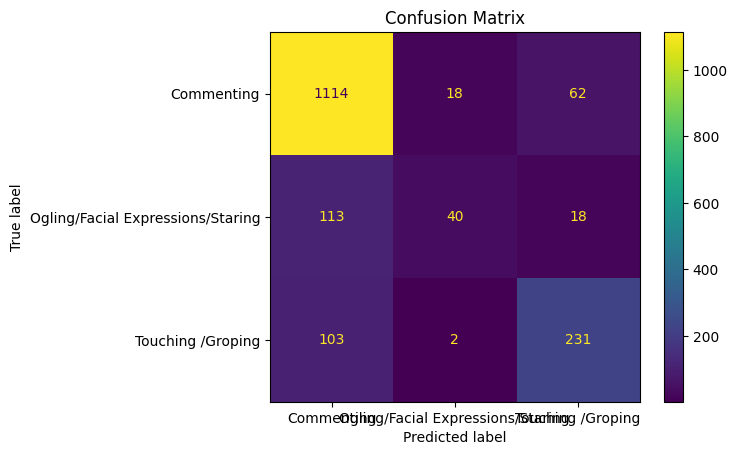

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Confusion Matrix
cm = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Commenting', 'Ogling/Facial Expressions/Staring', 'Touching /Groping'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()




In [ ]:
def classify_text(text):

    preprocessed_text = preprocess_text(text)

    text_tfidf = tfidf_vectorizer.transform([preprocessed_text])

    prediction = classifier.predict(text_tfidf)

    predicted_indices = np.where(prediction[0] == 1)[0]
    predicted_categories = train_data.columns[1:][predicted_indices]
    return predicted_categories

input_text = "IT HAPPENED NEAR MY residence that is in R.K PURAM SEC 8,NEAR GOVERNMENT SCHOOL ROAD..THERE WAS A GUY WALKING BEHIND ME AFTER FEW SECONDS I JUST REALIZED THAT GUY GROPED ME FROM BEHIND"
predicted_categories = classify_text(input_text)
print("Predicted Categories:", predicted_categories)

Predicted Categories: Index(['Touching /Groping'], dtype='object')


In [ ]:
!pip install shap lime

In [ ]:
import shap


base_estimator = classifier.estimators_[0]


explainer = shap.Explainer(base_estimator, X_train_tfidf)

def classify_text_with_shap(text):

    preprocessed_text = preprocess_text(text)

    text_tfidf = tfidf_vectorizer.transform([preprocessed_text])

    shap_values = explainer(text_tfidf)

    shap_summary = np.mean(np.abs(shap_values.values), axis=0)

    top_features = np.argsort(shap_summary)[::-1][:5]  # Top 5 features

    top_features_names = tfidf_vectorizer.get_feature_names_out()[top_features]
    return top_features_names

input_text = "IT HAPPENED NEAR MY residence that is in R.K PURAM SEC 8,NEAR GOVERNMENT SCHOOL ROAD..THERE WAS A GUY WALKING BEHIND ME AFTER FEW SECONDS I JUST REALIZED THAT GUY GROPED ME FROM BEHIND"
top_features = classify_text_with_shap(input_text)
print("Top Features:", top_features)

Top Features: ['groped' 'near' 'guy' 'comments' 'commented']


In [ ]:
!pip install shap

In [9]:
import shap
import numpy as np

base_estimator = classifier.estimators_[0]

explainer = shap.Explainer(base_estimator, X_train_tfidf)

def classify_text_with_shap(text):
    preprocessed_text = preprocess_text(text)
    text_tfidf = tfidf_vectorizer.transform([preprocessed_text])

    shap_values = explainer(text_tfidf)

    shap_summary = np.mean(np.abs(shap_values.values), axis=0)

    top_features = np.argsort(shap_summary)[::-1][:5]  # Top 5 features
    top_features_names = tfidf_vectorizer.get_feature_names_out()[top_features]

    print("SHAP Values for all features:", shap_values.values)
    print("Feature Names:", tfidf_vectorizer.get_feature_names_out())

    return shap_values.values, tfidf_vectorizer.get_feature_names_out()

input_text = "IT HAPPENED NEAR MY residence that is in R.K PURAM SEC 8,NEAR GOVERNMENT SCHOOL ROAD..THERE WAS A GUY WALKING BEHIND ME AFTER FEW SECONDS I JUST REALIZED THAT GUY GROPED ME FROM BEHIND"
shap_values, feature_names = classify_text_with_shap(input_text)

# Saving SHAP values to explanations.csv
shap_df = pd.DataFrame(shap_values, columns=feature_names)
shap_df.to_csv('explanations.csv', index=False)



SHAP Values for all features: [[-0.          0.          0.         ... -0.00089144 -0.
  -0.        ]]
Feature Names: ['aa' 'aaja' 'aakash' ... 'zoomed' 'zoosome' 'zor']
